<a href="https://colab.research.google.com/github/sayid-alt/German-Credit-Risk-Analysis/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Deep Learning - Pytorch

**Instructions for Students:**

Please carefully follow these steps to complete and submit your project:

1. **Make a copy of the Project**: Please make a copy of this project either to your own Google Drive or download locally. Work on the copy of the project. The master project is **Read-Only**, meaning you can edit, but it will not be saved when you close the master project. To avoid total loss of your work, remember to make a copy.

2. **Completing the Project**: You are required to work on and complete all tasks in the provided project. Be disciplined and ensure that you thoroughly engage with each task.
   
3. **Creating a Google Drive Folder**: Each of you must create a new folder on your Google Drive. This will be the repository for all your completed project files, aiding you in keeping your work organized and accessible.
   
4. **Uploading Completed Project**: Upon completion of your project, make sure to upload all necessary files, involving codes, reports, and related documents into the created Google Drive folder. Save this link in the 'Student Identity' section and also provide it as the last parameter in the `submit` function that has been provided.
   
5. **Sharing Folder Link**: You're required to share the link to your project Google Drive folder. This is crucial for the submission and evaluation of your project.
   
6. **Setting Permission to Public**: Please make sure your Google Drive folder is set to public. This allows your instructor to access your solutions and assess your work correctly.

Adhering to these procedures will facilitate a smooth project evaluation process for you and the reviewers.

## Project Description

The Deep Learning Projects are divided into two parts, the first is the Calculations worth 30% and the second one is Pytorch Project worth 70% in this notebook.

The two projects will help you gain experience to learn about Deep Learning in detail.

In this project, you will use what you learn to create your own Deep Learning model. We'll use a variety of datasets, each with different data types such as images, text, and numerical/categorical data. Your task is to choose one of these datasets and build a deep learning model upon it.


## Datasets

Choose one from the following datasets for your project:

1. **Digits Dataset**: A simplified version of MNIST containing 8x8 images of hand-written digits. [Dataset Link](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html)
2. **Dogs vs. Cats Dataset from Kaggle**: A sizable dataset of 25,000 images with equal representation of dogs and cats. [Dataset Link](https://www.kaggle.com/c/dogs-vs-cats)
3. **Breast Cancer Wisconsin (Diagnostic) Dataset**: Computed features from a digitized image of a fine needle aspirate (FNA) of a breast mass. [Dataset Link](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)
4. **Spam Text Message Classification Dataset**: A collection of labeled SMS messages, categorized as "spam" or "ham". [Dataset Link](https://www.kaggle.com/uciml/sms-spam-collection-dataset)
5. **German Credit Risk Dataset**: People's data categorized by various attributes to predict credit risk. [Dataset Link](https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29)



## Grading Criteria

Your work will be evaluated based on both accuracy and loss value:

100: The model has an accuracy of more than 80% and a Loss Value of less than 0.2. This model is excellent and demonstrates a strong understanding of the task.

90: The model has an accuracy between 70% - 79% and a Loss Value between 0.2 - 0.3. This model is very good, with some room for improvement.

80: The model has an accuracy between 60% - 69% and a Loss Value between 0.3 - 0.4. This model is fairly good but needs improvement in balancing accuracy and loss value.

70: The model has an accuracy between 50% - 59% and a Loss Value between 0.4 - 0.5. This model is below average and needs significant improvement.

60 or below: The model has an accuracy of less than 50% or a Loss Value of more than 0.5, or the student did not submit the accuracy and Loss Value. This model is poor and needs considerable improvement.

Rmember to make a copy of this notebook in your Google Drive and work in your own copy.

Let's start your deep learning journey! Choose your dataset and delve into the project! Happy modeling!

## Student Identity

In [ ]:
# @title #### Student Identity
student_id = "" # @param {type:"string"}
name = "" # @param {type:"string"}
drive_link = ""  # @param {type:"string"}

assignment_id = "00_pytorch_project"

# Import grader package
!pip install rggrader
from rggrader import submit, submit_image

## Project Structure

Your project should be organized into five main sections.

### 1. Package and Module Installation

First, let's pool all package and module that you'll need in the installation section below.

In [1]:
# Write any package/module installation that you need
# pip install goes here, this helps declutter your output below
!pip install ucimlrepo -q

In [2]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

### 2. Data Loading and Preprocessing

Load the chosen dataset and preprocess it for deep learning.

In [3]:
# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets
y['class'] = y['class'] - 1 # 1 = bad, 0 = good

# metadata
print(statlog_german_credit_data.metadata)

# variable information
print(statlog_german_credit_data.variables)


{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Attribute1   1000 non-null   object
 1   Attribute2   1000 non-null   int64 
 2   Attribute3   1000 non-null   object
 3   Attribute4   1000 non-null   object
 4   Attribute5   1000 non-null   int64 
 5   Attribute6   1000 non-null   object
 6   Attribute7   1000 non-null   object
 7   Attribute8   1000 non-null   int64 
 8   Attribute9   1000 non-null   object
 9   Attribute10  1000 non-null   object
 10  Attribute11  1000 non-null   int64 
 11  Attribute12  1000 non-null   object
 12  Attribute13  1000 non-null   int64 
 13  Attribute14  1000 non-null   object
 14  Attribute15  1000 non-null   object
 15  Attribute16  1000 non-null   int64 
 16  Attribute17  1000 non-null   object
 17  Attribute18  1000 non-null   int64 
 18  Attribute19  1000 non-null   object
 19  Attribute20  1000 non-null  

In [5]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns
num_df = X[num_cols]
cat_df = X[cat_cols]

print(num_cols)
print(cat_cols)
display(num_df.head())
display(cat_df.head())

Index(['Attribute2', 'Attribute5', 'Attribute8', 'Attribute11', 'Attribute13',
       'Attribute16', 'Attribute18'],
      dtype='object')
Index(['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7',
       'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14',
       'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20'],
      dtype='object')


,Attribute2,Attribute5,Attribute8,Attribute11,Attribute13,Attribute16,Attribute18
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2
3,42,7882,2,4,45,1,2
4,24,4870,3,4,53,2,2


,Attribute1,Attribute3,Attribute4,Attribute6,Attribute7,Attribute9,Attribute10,Attribute12,Attribute14,Attribute15,Attribute17,Attribute19,Attribute20
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A172,A191,A201
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A173,A191,A201
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A173,A191,A201


#### Label Encoder

Encode all the values of categorical columns

In [6]:
class CategoricalEncoder(TransformerMixin, BaseEstimator):
  def __init__(self, cat_cols):
    self.cat_cols = cat_cols
    self.encoder = LabelEncoder()

  def fit(self, X, y=None):
    return self

  def transform(self, X, y=None):
    X_encoded = X.copy()
    for col in self.cat_cols:
      X_encoded[col] = self.encoder.fit_transform(X[col])

    return X_encoded

encoder = CategoricalEncoder(cat_cols)
cat_encoded_df = encoder.fit_transform(X)
cat_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Attribute1   1000 non-null   int64
 1   Attribute2   1000 non-null   int64
 2   Attribute3   1000 non-null   int64
 3   Attribute4   1000 non-null   int64
 4   Attribute5   1000 non-null   int64
 5   Attribute6   1000 non-null   int64
 6   Attribute7   1000 non-null   int64
 7   Attribute8   1000 non-null   int64
 8   Attribute9   1000 non-null   int64
 9   Attribute10  1000 non-null   int64
 10  Attribute11  1000 non-null   int64
 11  Attribute12  1000 non-null   int64
 12  Attribute13  1000 non-null   int64
 13  Attribute14  1000 non-null   int64
 14  Attribute15  1000 non-null   int64
 15  Attribute16  1000 non-null   int64
 16  Attribute17  1000 non-null   int64
 17  Attribute18  1000 non-null   int64
 18  Attribute19  1000 non-null   int64
 19  Attribute20  1000 non-null   int64
dtypes: int64(

#### Checking Numerical Distribution Data

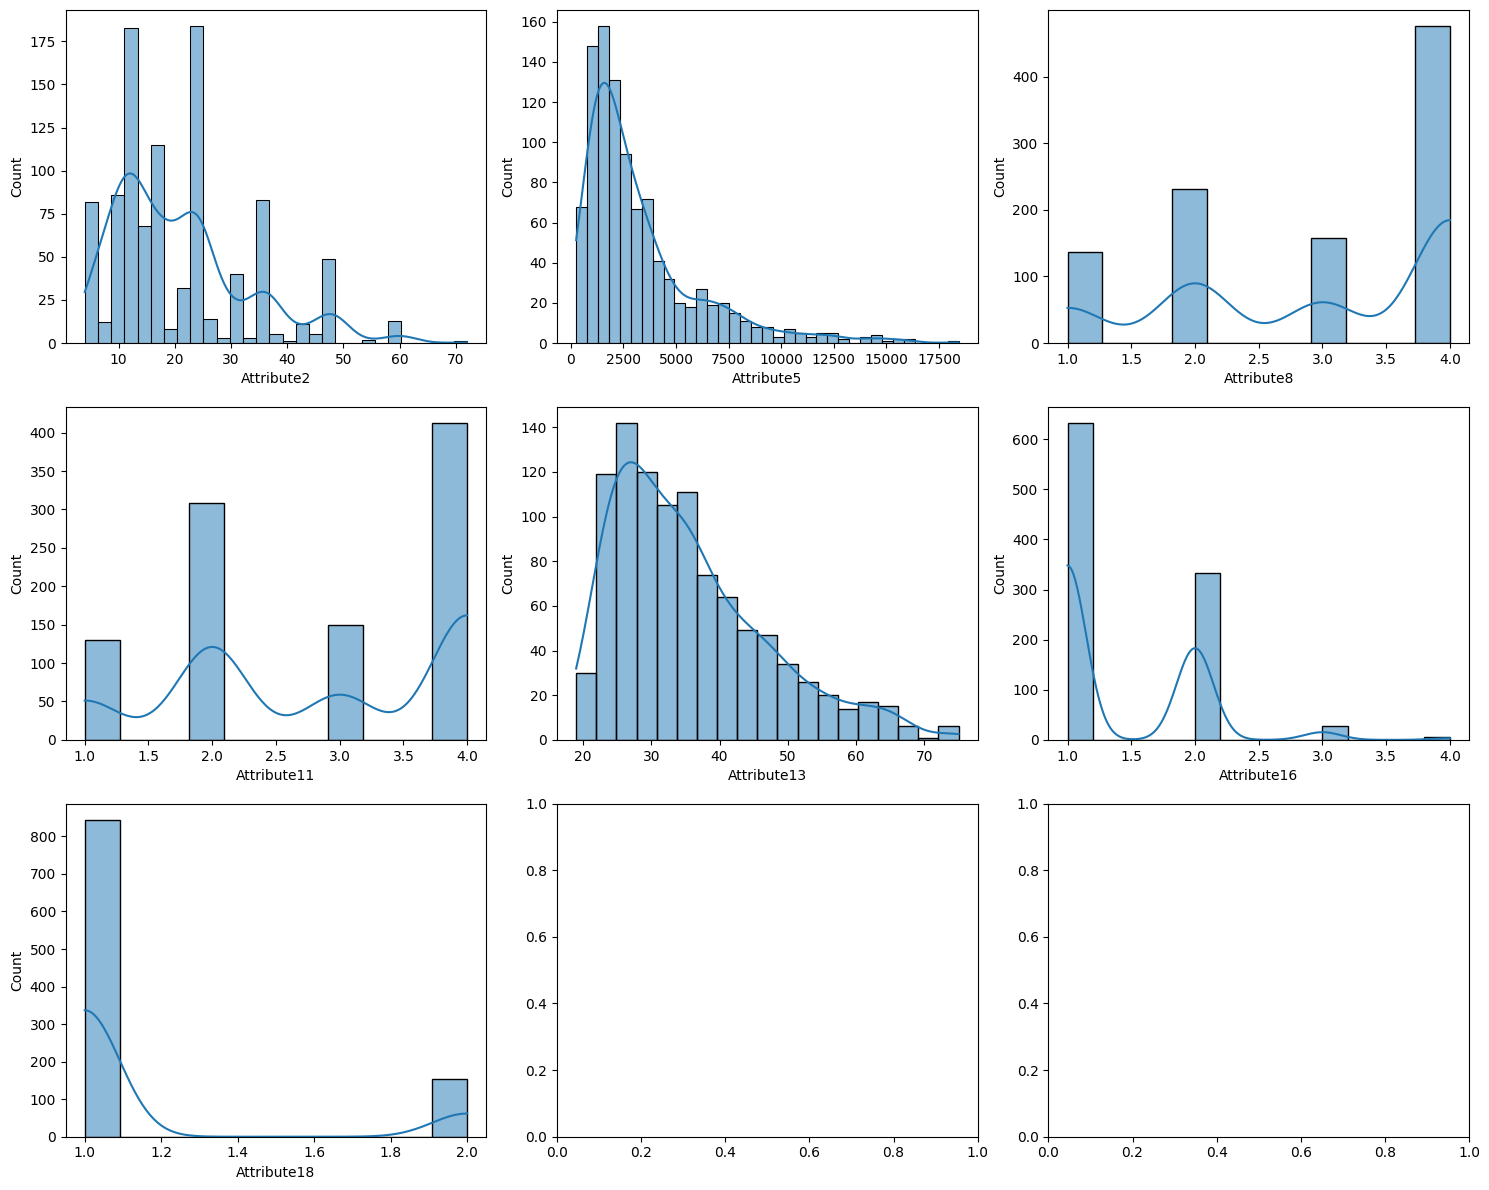

In [7]:
def plot_distribution(df):
  ncols = 3
  nrows = len(df.columns) // ncols
  if len(df.columns) % ncols != 0:
    nrows += 1

  fig, axes = plt.subplots(nrows, ncols, figsize=(15, 4*nrows))
  axes = axes.flatten()

  for i, ax in enumerate(axes):
    if i < len(df.columns):
      sns.histplot(data=df, x=df.columns[i], kde=True, ax=ax)
      plt.tight_layout()

  plt.show()

plot_distribution(num_df)

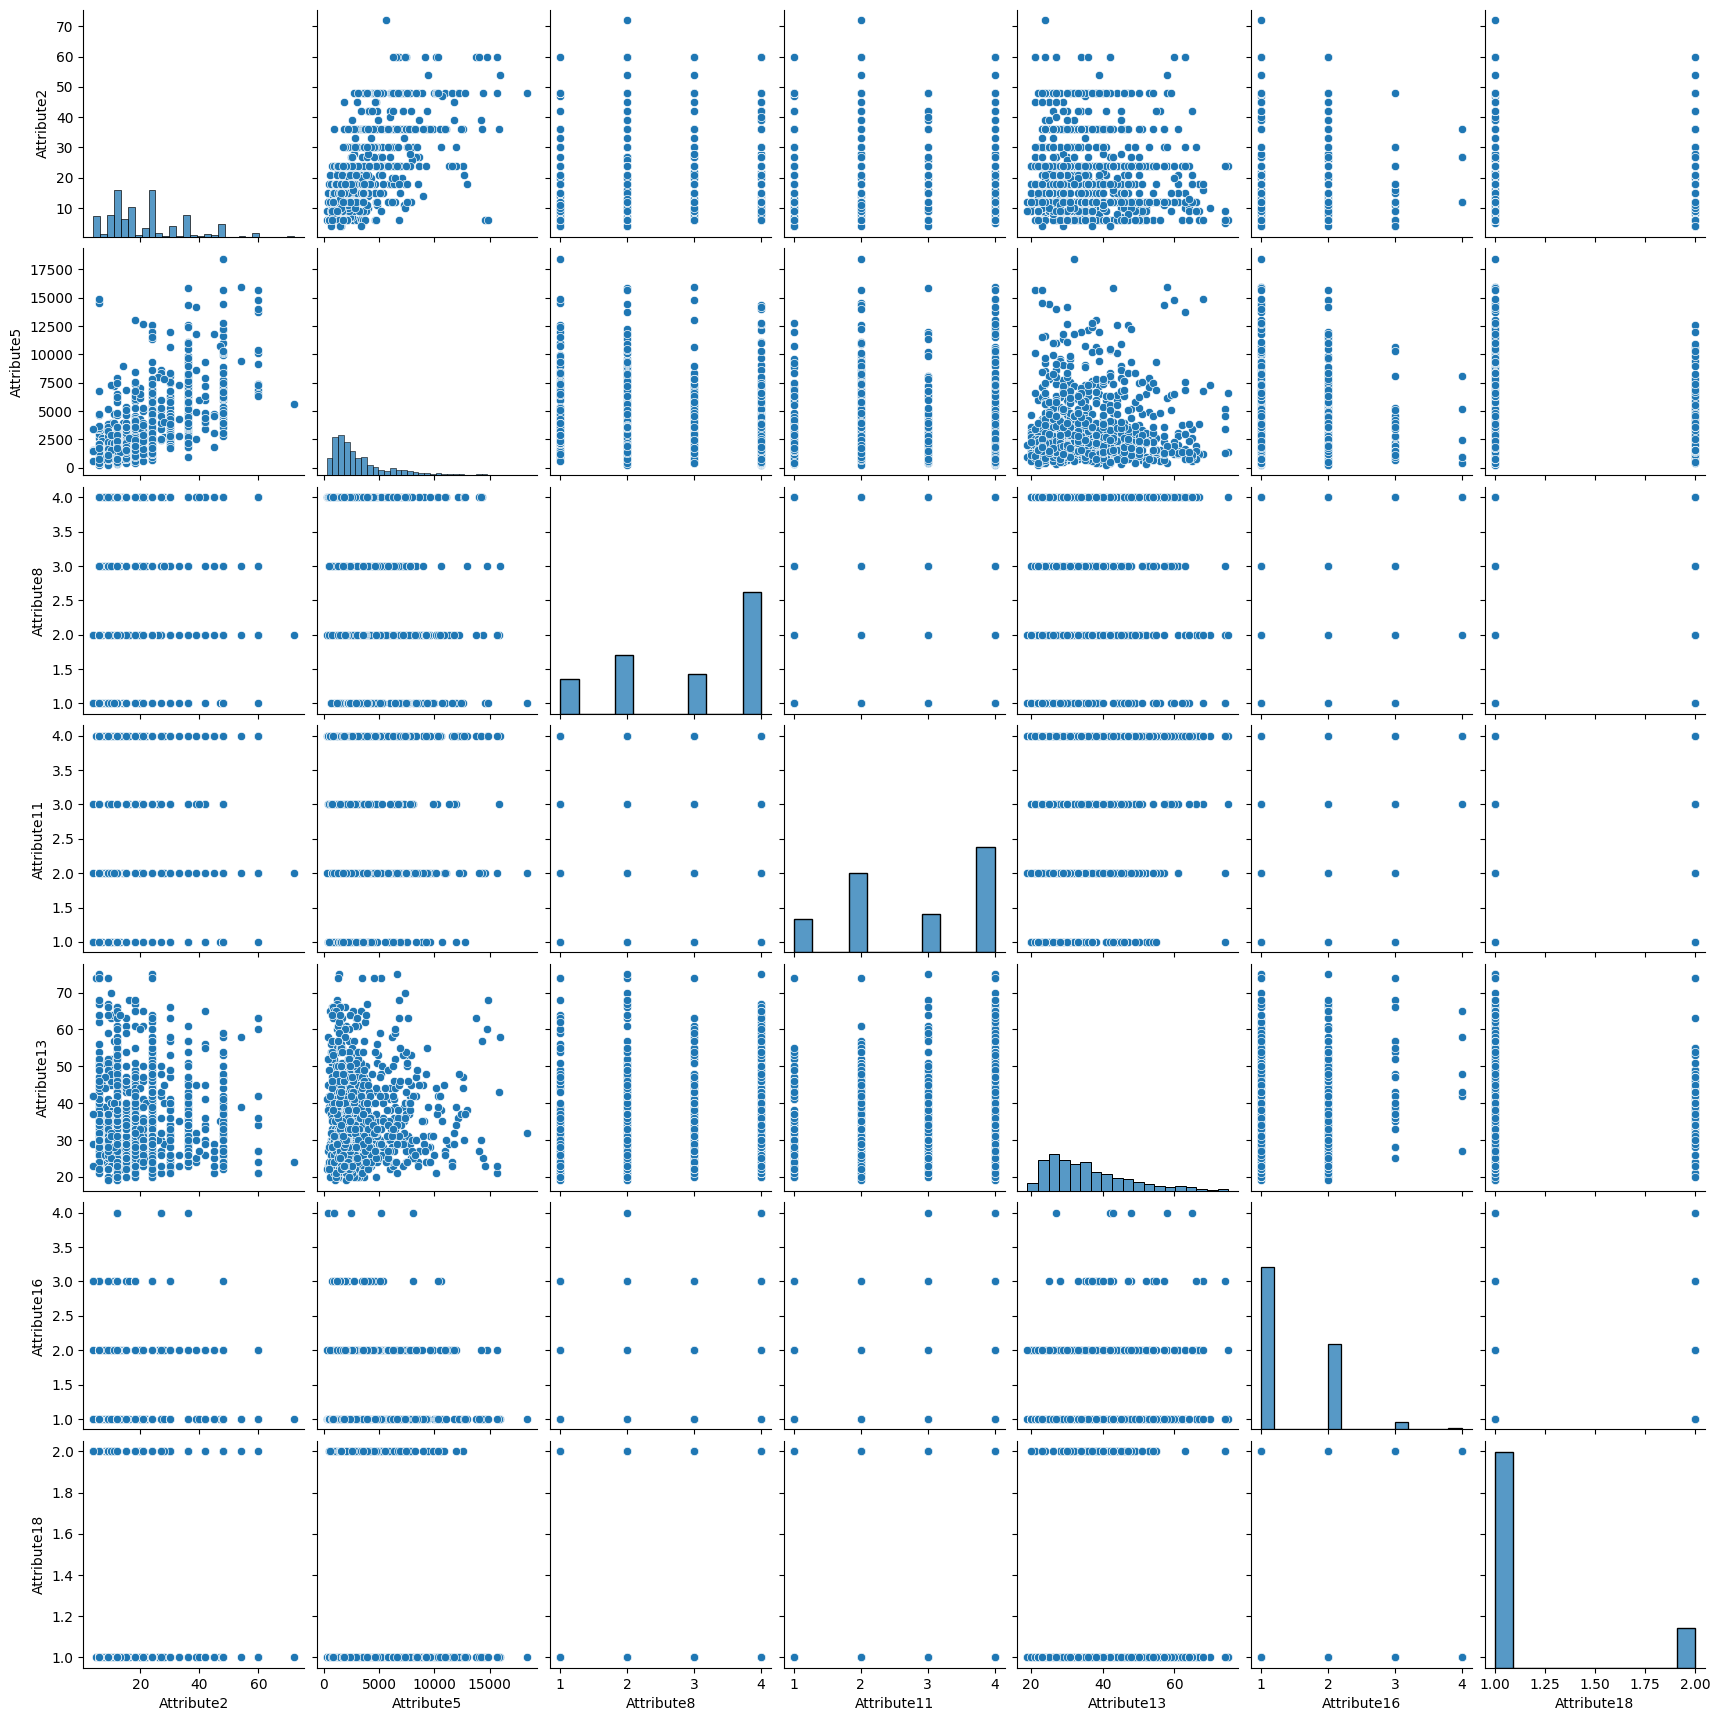

In [8]:
sns.pairplot(num_df)

In [9]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(num_df), columns=num_df.columns)
scaled_df.head()

,Attribute2,Attribute5,Attribute8,Attribute11,Attribute13,Attribute16,Attribute18
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869


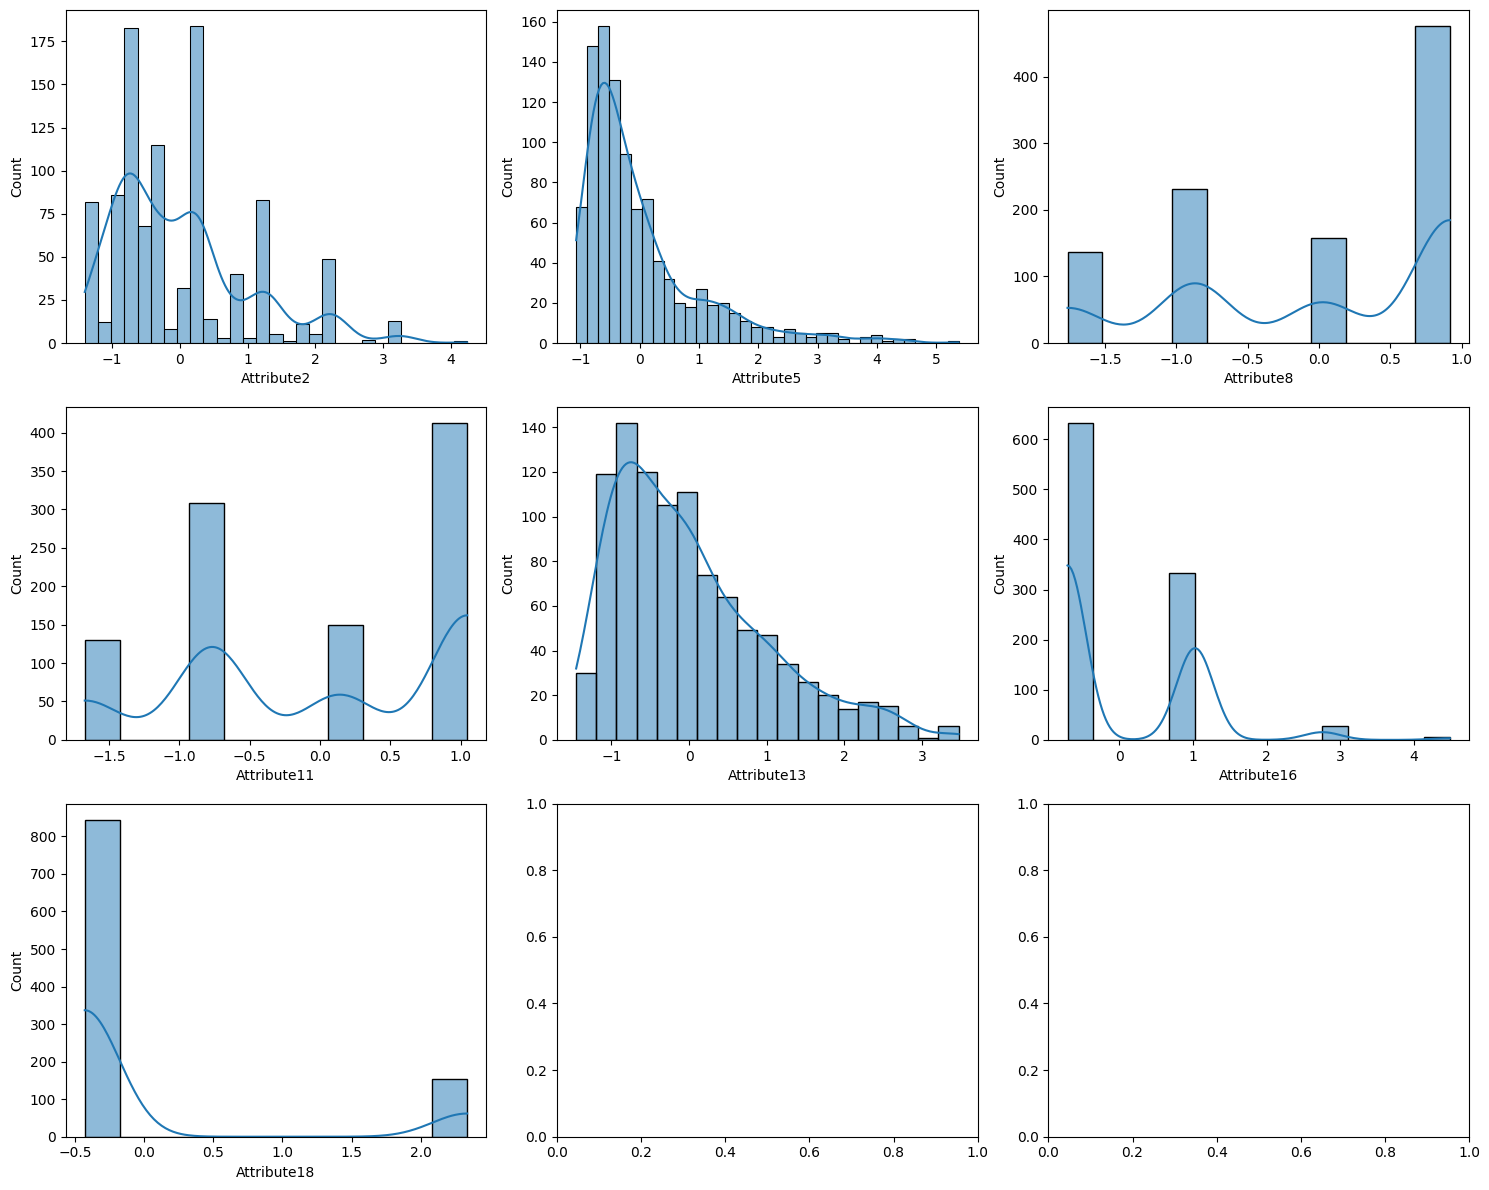

In [10]:
plot_distribution(scaled_df)

<Axes: xlabel='class', ylabel='count'>

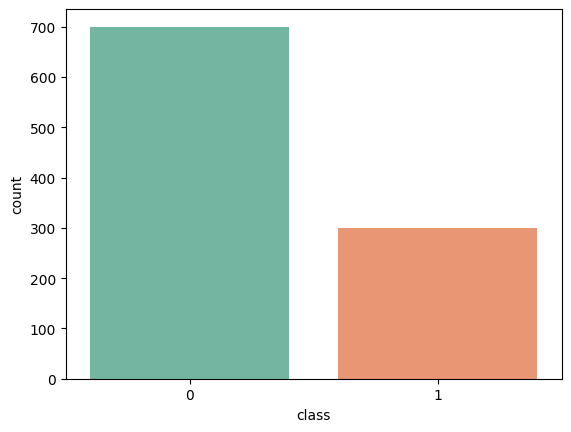

In [13]:
sns.countplot(y, x='class', palette='Set2')

In [90]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('encoder', CategoricalEncoder(cat_cols)),
    ('scaler', StandardScaler())
])

df_preprocessed = pipe.fit_transform(X)
df_preprocessed

array([[-1.25456565, -1.23647786,  1.34401408, ..., -0.42828957,
         1.21459768, -0.19601428],
       [-0.45902624,  2.24819436, -0.50342796, ..., -0.42828957,
        -0.82331789, -0.19601428],
       [ 1.13205258, -0.73866754,  1.34401408, ...,  2.33486893,
        -0.82331789, -0.19601428],
       ...,
       [ 1.13205258, -0.73866754, -0.50342796, ..., -0.42828957,
        -0.82331789, -0.19601428],
       [-1.25456565,  1.9992892 , -0.50342796, ..., -0.42828957,
         1.21459768, -0.19601428],
       [-0.45902624,  1.9992892 ,  1.34401408, ..., -0.42828957,
        -0.82331789, -0.19601428]])

,PC1,PC2,label
0,0.636225,3.460572,0
1,-0.156967,-2.516921,1
2,-1.230613,2.092847,0
3,1.351777,-0.671411,0
4,1.881100,1.246952,1


<Axes: xlabel='PC1', ylabel='PC2'>

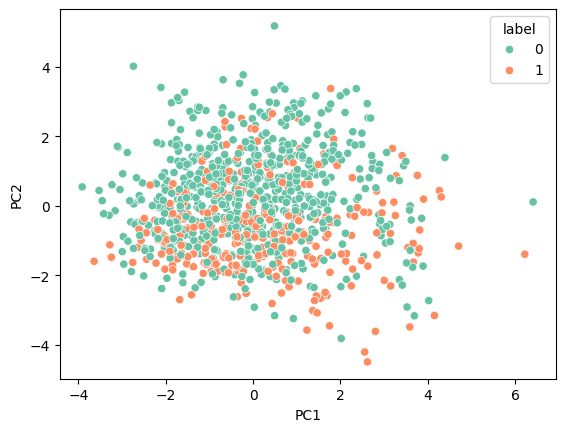

In [96]:
pca_df = pd.DataFrame(PCA(n_components=2).fit_transform(df_preprocessed), columns=['PC1', 'PC2'])
pca_df['label'] = y.values
display(pca_df.head())
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='label', palette='Set2')

#### Split Data

Train size: 800
Valid size: 100
Test size: 100


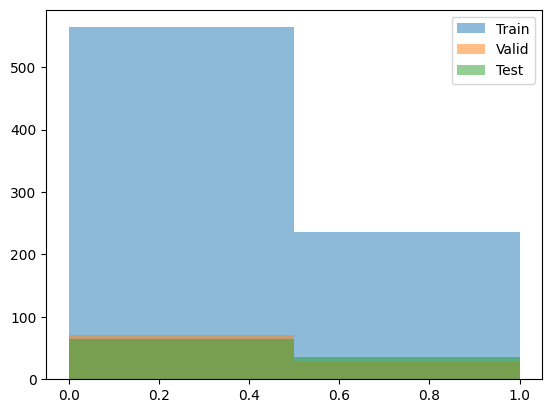

In [91]:
X_tensor = torch.from_numpy(df_preprocessed).type(torch.FloatTensor)
y_tensor = torch.from_numpy(y.values).type(torch.FloatTensor)

# index permutation
indices = torch.randperm(X_tensor.size(0))

# split train data
X_train = torch.index_select(X_tensor, dim=0, index=indices[:800])
y_train = torch.index_select(y_tensor, dim=0, index=indices[:800])

# split valid data
X_valid = torch.index_select(X_tensor, dim=0, index=indices[800:900])
y_valid = torch.index_select(y_tensor, dim=0, index=indices[800:900])

# split test data
X_test = torch.index_select(X_tensor, dim=0, index=indices[900:])
y_test = torch.index_select(y_tensor, dim=0, index=indices[900:])


# Split summary
print(f'Train size: {X_train.size(0)}')
print(f'Valid size: {X_valid.size(0)}')
print(f'Test size: {X_test.size(0)}')

plt.hist(y_train, bins=2, label='Train', alpha=0.5)
plt.hist(y_valid, bins=2, label='Valid', alpha=0.5)
plt.hist(y_test, bins=2, label='Test', alpha=0.5)
plt.legend()

### 3. Model Building

Define your deep learning model's architecture.

In [158]:
# Write your code here for Model Building here

# define your Deep Learning Model here, training is in the next section.
import torch.nn as nn
class NetClassifier(nn.Module):
  def __init__(self, n_features, n_hidden, n_output):
    super().__init__()
    self.n_features = n_features
    self.n_output = n_output
    self.linear = nn.Linear(n_features, n_hidden)
    # self.hidden = nn.Linear(n_hidden, n_hidden)
    self.output = nn.Linear(n_hidden, n_output)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.relu(self.linear(x))
    # x = self.relu(self.hidden(x))
    x = self.output(x)
    return self.sigmoid(x)


model_clf = NetClassifier(n_features=X_train.size(1), n_hidden=20, n_output=1)
model_clf

NetClassifier(
  (linear): Linear(in_features=20, out_features=20, bias=True)
  (output): Linear(in_features=20, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

### 4. Model Training

Train your model and evaluate its performance using validation data.

In [159]:
X_train.shape, X_test.shape

(torch.Size([800, 20]), torch.Size([100, 20]))

epoch[1/1000] - acc: 0.6975, loss: 0.681265 - val_acc: 0.630000, val_loss: 0.676087
epoch[21/1000] - acc: 0.7050, loss: 0.618327 - val_acc: 0.650000, val_loss: 0.654362
epoch[41/1000] - acc: 0.7050, loss: 0.585361 - val_acc: 0.650000, val_loss: 0.659558
epoch[61/1000] - acc: 0.7050, loss: 0.559387 - val_acc: 0.650000, val_loss: 0.673210
epoch[81/1000] - acc: 0.7075, loss: 0.537171 - val_acc: 0.660000, val_loss: 0.692280
epoch[101/1000] - acc: 0.7113, loss: 0.518272 - val_acc: 0.660000, val_loss: 0.716458
epoch[121/1000] - acc: 0.7237, loss: 0.502914 - val_acc: 0.650000, val_loss: 0.743705
epoch[141/1000] - acc: 0.7412, loss: 0.490965 - val_acc: 0.600000, val_loss: 0.771547
epoch[161/1000] - acc: 0.7588, loss: 0.481904 - val_acc: 0.600000, val_loss: 0.798308
epoch[181/1000] - acc: 0.7663, loss: 0.475016 - val_acc: 0.580000, val_loss: 0.822474
epoch[201/1000] - acc: 0.7638, loss: 0.469656 - val_acc: 0.580000, val_loss: 0.843290
epoch[221/1000] - acc: 0.7688, loss: 0.465324 - val_acc: 0.5

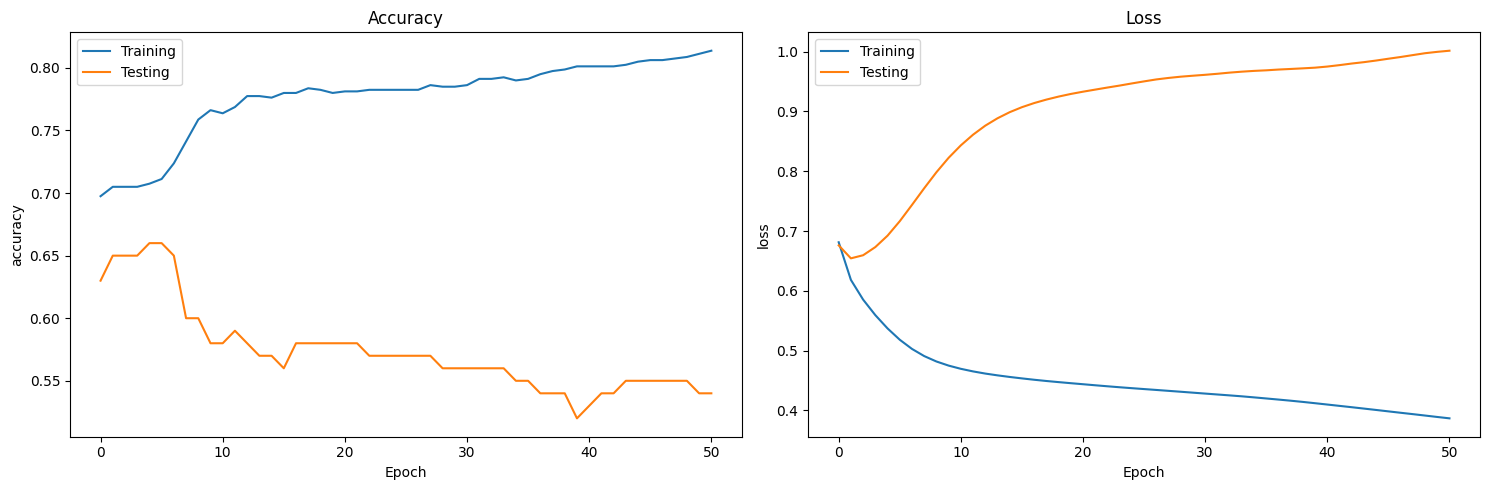

In [160]:
# Write your code here for Model Training here
from collections import defaultdict
dl_loss_value = 1

optimizer = torch.optim.SGD(model_clf.parameters(), lr=0.08)
loss_func = torch.nn.BCELoss()

# Define dictionary to store loss & accuracy values
metrics = {
    'accuracy': defaultdict(list),
    'loss': defaultdict(list)
}
# defince accuracy function
def accuracy(output, y_true):
  y_pred = (output > 0.6).float()
  return torch.tensor(torch.sum(y_pred == y_true).item() / len(y_true))

#define the iteration
epoch = 1000

#create the training loop
for i in range(epoch):
  # model training
  model_clf.train()
  y_train_pred = model_clf(X_train)

  train_loss = loss_func(y_train_pred, y_train)
  train_accuracy = accuracy(y_train_pred, y_train)

  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  # model evaluation
  model_clf.eval()
  with torch.inference_mode():
    y_test_pred = model_clf(X_valid)
    test_loss = loss_func(y_test_pred, y_test)
    test_accuracy = accuracy(y_test_pred, y_test)
    dl_loss_value = test_loss.item()

  if i % 20 == 0 or i == epoch - 1:
    metrics['accuracy']['training'].append(train_accuracy.item())
    metrics['accuracy']['testing'].append(test_accuracy.item())
    metrics['loss']['training'].append(train_loss.data.numpy())
    metrics['loss']['testing'].append(test_loss.data.numpy())
    print(f'epoch[{i+1}/{epoch}] - acc: {train_accuracy:.4f}, loss: {train_loss:4f} - val_acc: {test_accuracy:4f}, val_loss: {test_loss:4f}')


def plot_model_summary(metrics):
    """Plots training and testing accuracy and loss from a dictionary."""

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns
    axes = axes.flatten()

    metrics_names = ['accuracy', 'loss']

    for i, metric_name in enumerate(metrics_names):
        axes[i].plot(metrics[metric_name]['training'], label='Training')  # Plot training data
        axes[i].plot(metrics[metric_name]['testing'], label='Testing')   # Plot testing data
        axes[i].set_title(f'{metric_name.capitalize()}')  # Capitalize title
        axes[i].set_xlabel('Epoch')
        axes[i].set_ylabel(metric_name)
        axes[i].legend()  # Show the legend

    plt.tight_layout()
    plt.show()

plot_model_summary(metrics)


### 5. Model Evaluation
Evaluate your model's performance on the test data using the grading scheme defined above.

In [111]:
# Write your code here for Model Evaluation here
dl_accuracy = 0

#define the iteration

#create the training loop


## Submission

Once you are satisfied with the performance of your model, then you run the code block below to submit your project.


In [ ]:
# Submit Method

# Do not change the code below
question_id = "01_dl_project_accuracy"
submit(student_id, name, assignment_id, str(dl_accuracy), question_id, drive_link)
question_id = "02_dl_project_loss_value"
submit(student_id, name, assignment_id, str(dl_loss_value), question_id, drive_link)

## FIN